## Lab 2
### Name: Behnam Sobhani Nadri
### Student ID: 801368949


## All libraries that we use in the lab is defined here

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cost function and the Gradient Descent Algorithm

In [40]:
def compute_cost(X, y, theta):
    m_y = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m_y) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m_y = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m_y) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history


## This block reads the dataset from the csv file and choose the target explanatory variable

In [41]:
file_path = '/content/drive/My Drive/Courses/Intro to ML/Lab2/Housing.csv'
df = pd.read_csv(file_path)
split = 0.20 # Split ratio
a = int(df.shape[0]*(1-split))

df_train = df.iloc[0:a,:]
df_valid = df.iloc[a:,:]

y_train = df_train.values[:, 0]
y_valid = df_valid.values[:, 0]

df_train1 = (df_train.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_train = pd.concat([df_train.iloc[:,[0,1,2,3,4,10,12]], df_train1], axis = 1)
df_valid1 = (df_valid.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_valid = pd.concat([df_valid.iloc[:,[0,1,2,3,4,10,12]], df_valid1], axis = 1)

## Problem I A: Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

## Area, bedrooms, bathrooms, stories, parking

In [42]:
df_train.iloc[:,[0,1,2,3,4,5]]

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
431,3290000,3180,4,1,2,0
432,3290000,6060,3,1,1,0
433,3290000,3480,4,1,2,1
434,3290000,3792,4,1,2,0


In [43]:
X1_train = df_train.values[:, 1]
X2_train = df_train.values[:, 2]
X3_train = df_train.values[:, 3]
X4_train = df_train.values[:, 4]
X5_train = df_train.values[:, 5]

X1_valid = df_valid.values[:, 1]
X2_valid = df_valid.values[:, 2]
X3_valid = df_valid.values[:, 3]
X4_valid = df_valid.values[:, 4]
X5_valid = df_valid.values[:, 5]

m_train = len(y_train)
m_valid = len(y_valid)
n_train = len(X1_train)
n_valid = len(X1_valid)

X_0_train = np.ones((m_train, 1))
X_1_train = X1_train.reshape(m_train, 1)
X_2_train = X2_train.reshape(m_train, 1)
X_3_train = X3_train.reshape(m_train, 1)
X_4_train = X4_train.reshape(m_train, 1)
X_5_train = X5_train.reshape(m_train, 1)
X_train = np.hstack((X_0_train, X_1_train, X_2_train, X_3_train, X_4_train, X_5_train))


X_0_valid = np.ones((m_valid, 1))
X_1_valid = X1_valid.reshape(m_valid, 1)
X_2_valid = X2_valid.reshape(m_valid, 1)
X_3_valid = X3_valid.reshape(m_valid, 1)
X_4_valid = X4_valid.reshape(m_valid, 1)
X_5_valid = X5_valid.reshape(m_valid, 1)
X_valid = np.hstack((X_0_valid, X_1_valid, X_2_valid, X_3_valid, X_4_valid, X_5_valid))


In [44]:
it = 100 # Maximum iterations
# alpha = 0.000000010 # Learning Rate
alpha = 0.01
# alpha =   0.000000100 # Learning Rate

# theta = np.zeros(6)
# theta = [1,1,1,1,1,1]
theta = [3,1,5,100,2,3.4]

print(f' Maximum iterations: {it}')
print(f'Learning rate is: {alpha}')
print(f'θ is: {theta}')

 Maximum iterations: 100
Learning rate is: 0.01
θ is: [3, 1, 5, 100, 2, 3.4]


In [45]:
cost_train = compute_cost(X_train, y_train, theta)
print('The cost of the test dataset for given values of theta_0 and theta_1 =', cost_train)

cost_valid = compute_cost(X_valid, y_valid, theta)
print('The cost of the validation dataset for given values of theta_0 and theta_1 =', cost_valid)

theta, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, it)
print('Final value of theta for test =', theta)

theta, cost_history_valid = gradient_descent(X_valid, y_valid, theta, alpha, it)
print('Final value of theta for validation =', theta)

# theta_valid, cost_history_valid = gradient_descent(X_valid, y_valid, theta_valid, alpha, it)
# print('Final value of theta for validation =', theta_valid)


The cost of the test dataset for given values of theta_0 and theta_1 = 15404174799072.887
The cost of the validation dataset for given values of theta_0 and theta_1 = 3780444810561.2163
Final value of theta for test = [nan nan nan nan nan nan]
Final value of theta for validation = [nan nan nan nan nan nan]


<ipython-input-40-26b51ea36a5e>:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)


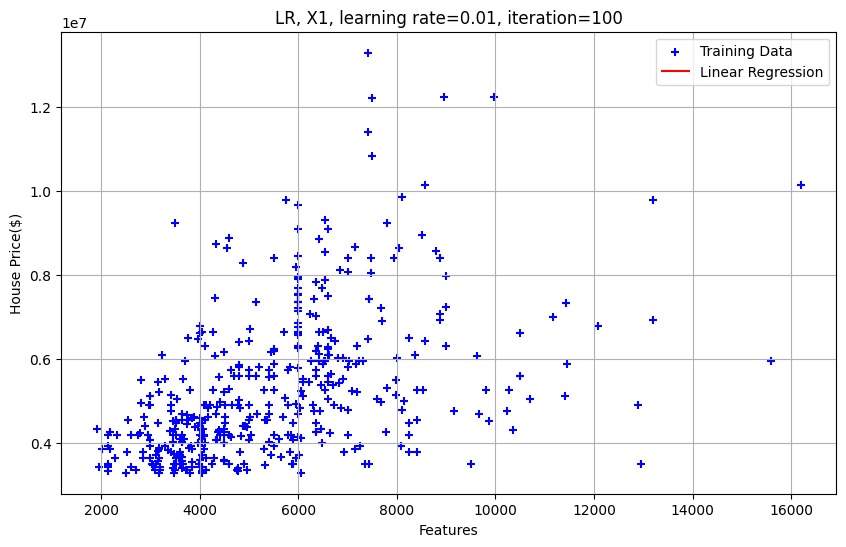

In [46]:
plt.scatter(X_train[:,1], y_train, color='b', marker= '+', label= 'Training Data')
plt.plot(X_train[:,1],X_train.dot(theta), color='r', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Features')
plt.ylabel('House Price($)')
plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
plt.legend()
plt.grid()

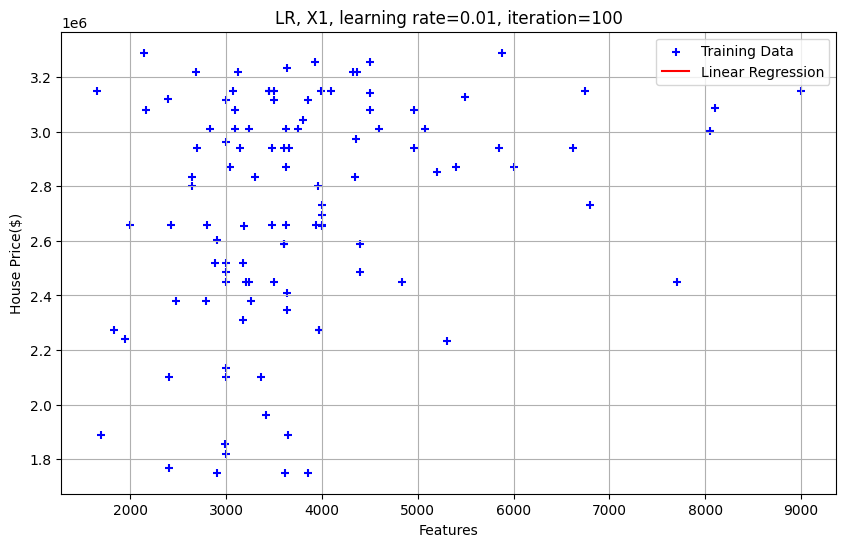

In [47]:
plt.scatter(X_valid[:,1], y_valid, color='b', marker= '+', label= 'Training Data')
plt.plot(X_valid[:,1], X_valid.dot(theta), color='r', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Features')
plt.ylabel('House Price($)')
plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
plt.legend()
plt.grid()

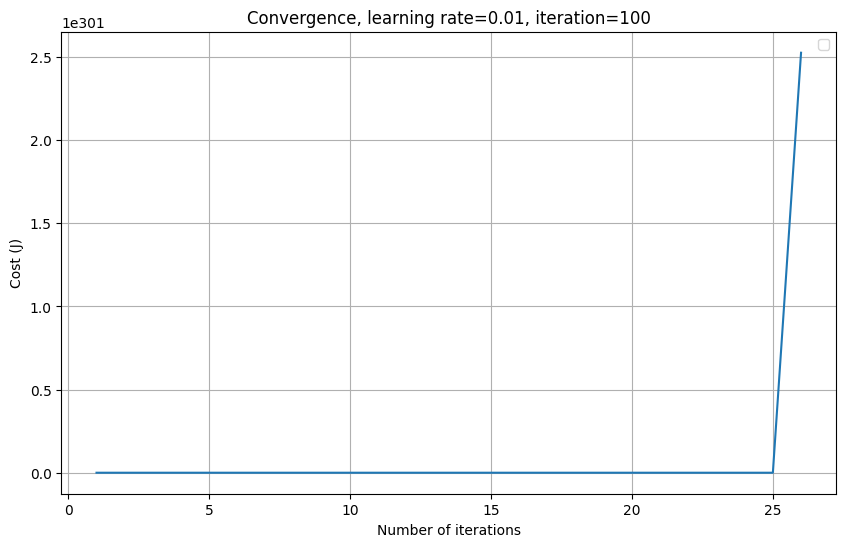

In [48]:
plt.plot(range(1, it + 1), cost_history_train)
plt.plot(range(1, it + 1), cost_history_valid)

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title(f'Convergence, learning rate={alpha}, iteration={it}')
plt.legend()


# Problem II A

## Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. **In both cases, you do not need to normalize the output**

### Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results

In [127]:
# scaler = 'normalize'
scaler = 'standard'

df_train = df.iloc[0:a,:]
df_valid = df.iloc[a:,:]
y_train = df_train.values[:, 0]
y_valid = df_valid.values[:, 0]

df_train1 = (df_train.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_train = pd.concat([df_train.iloc[:,[0,1,2,3,4,10,12]], df_train1], axis = 1)

df_valid1 = (df_valid.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_valid = pd.concat([df_valid.iloc[:,[0,1,2,3,4,10,12]], df_valid1], axis = 1)

df_train_s = df_train.drop(['price','furnishingstatus'], axis='columns')
df_valid_s = df_valid.drop(['price','furnishingstatus'], axis='columns')

if scaler == 'normalize':
    min_max_scaled= preprocessing.MinMaxScaler()
else:
    min_max_scaled= preprocessing.StandardScaler()

df_train_scaled = min_max_scaled.fit_transform(df_train_s)
df_valid_scaled = min_max_scaled.fit_transform(df_valid_s)
df_train_scaled = pd.DataFrame(df_train_scaled)
df_valid_scaled = pd.DataFrame(df_valid_scaled)
# df_train_scaled


In [50]:
X1_train_scaled = df_train_scaled.values[:, 0]
X2_train_scaled = df_train_scaled.values[:, 1]
X3_train_scaled = df_train_scaled.values[:, 2]
X4_train_scaled = df_train_scaled.values[:, 3]
X5_train_scaled = df_train_scaled.values[:, 4]

X1_valid_scaled = df_valid_scaled.values[:, 0]
X2_valid_scaled = df_valid_scaled.values[:, 1]
X3_valid_scaled = df_valid_scaled.values[:, 2]
X4_valid_scaled = df_valid_scaled.values[:, 3]
X5_valid_scaled = df_valid_scaled.values[:, 4]

m_train = len(y_train)
m_valid = len(y_valid)
n_train = len(X1_train_scaled)
n_valid = len(X1_valid_scaled)

X_0_train_scaled = np.ones((m_train, 1))
X_1_train_scaled = X1_train_scaled.reshape(m_train, 1)
X_2_train_scaled = X2_train_scaled.reshape(m_train, 1)
X_3_train_scaled = X3_train_scaled.reshape(m_train, 1)
X_4_train_scaled = X4_train_scaled.reshape(m_train, 1)


X_0_valid_scaled = np.ones((m_valid, 1))
X_1_valid_scaled = X1_valid_scaled.reshape(m_valid, 1)
X_2_valid_scaled = X2_valid_scaled.reshape(m_valid, 1)
X_3_valid_scaled = X3_valid_scaled.reshape(m_valid, 1)
X_4_valid_scaled = X4_valid_scaled.reshape(m_valid, 1)

X_train_scaled = np.hstack((X_0_train_scaled, X_1_train_scaled, X_2_train_scaled, X_3_train_scaled, X_4_train_scaled))
X_valid_scaled = np.hstack((X_0_valid_scaled, X_1_valid_scaled, X_2_valid_scaled, X_3_valid_scaled, X_4_valid_scaled))

In [51]:
it = 100 # Maximum iterations
alpha = 0.1 # Learning Rate
# alpha = 0.01 # Learning Rate

# theta_scaled = np.zeros(5)
# theta_scaled = [1,1,1,1,1]
theta_scaled = [3,1,5,100,3.4]

print(f' Maximum iterations: {it}')
print(f'Learning rate is: {alpha}')
print(f'θ is: {theta_scaled}')

 Maximum iterations: 100
Learning rate is: 0.1
θ is: [3, 1, 5, 100, 3.4]


In [52]:
cost_train_scaled = compute_cost(X_train_scaled, y_train, theta_scaled)
print('The cost of the test dataset for given values of theta_0 and theta_1 =', cost_train_scaled)

cost_valid_scaled = compute_cost(X_valid_scaled, y_valid, theta_scaled)
print('The cost of the validation dataset for given values of theta_0 and theta_1 =', cost_valid_scaled)

theta_scaled, cost_history_train_scaled = gradient_descent(X_train_scaled, y_train, theta_scaled, alpha, it)
print('Final value of theta for test =', theta_scaled)

theta_scaled, cost_history_valid_scaled = gradient_descent(X_valid_scaled, y_valid, theta_scaled, alpha, it)
print('Final value of theta for validation =', theta_scaled)


The cost of the test dataset for given values of theta_0 and theta_1 = 15435717293691.42
The cost of the validation dataset for given values of theta_0 and theta_1 = 3791276204046.038
Final value of theta for test = [5277625.7326651085 720897.0294107418 101364.27219117577 583023.2775986538
 439969.7267405759]
Final value of theta for validation = [2722650.43432799 113295.4883809374 -31788.065005105975 -8767.150986341852
 64028.15281133499]


In [53]:
# plt.scatter(X_train_scaled[:,1], y_train, color='b', marker= '+', label= 'Training Data')
# plt.plot(X_train_scaled[:,1],X_train_scaled.dot(theta_train_scaled), color='r', label='Linear Regression')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('Input')
# plt.ylabel('House Price($)')
# plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
# plt.legend()
# plt.grid()

In [54]:
# plt.scatter(X_valid_scaled[:,1], y_valid, color='b', marker= '+', label= 'Training Data')
# plt.plot(X_valid_scaled[:,1], X_valid_scaled.dot(theta_valid_scaled), color='r', label='Linear Regression')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('Features')
# plt.ylabel('House Price($)')
# plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
# plt.legend()
# plt.grid()

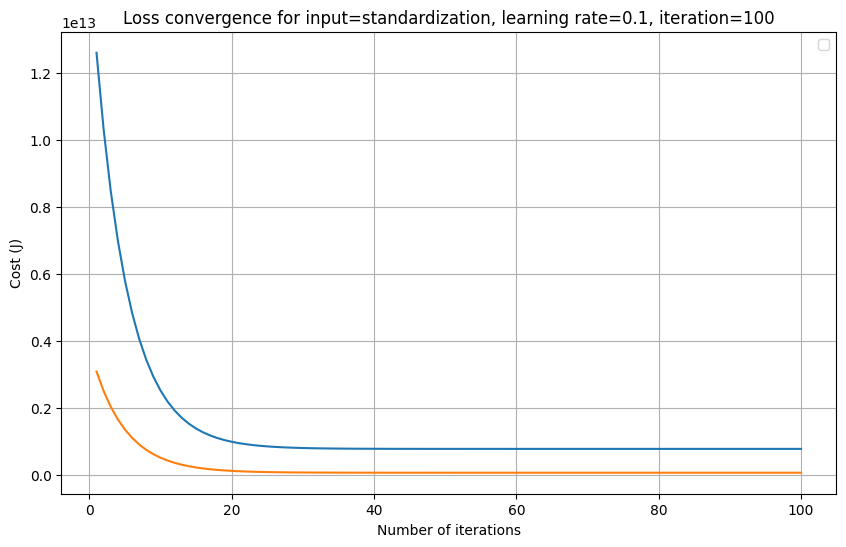

In [55]:
plt.plot(range(1, it + 1), cost_history_train_scaled)
plt.plot(range(1, it + 1), cost_history_valid_scaled)

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title(f'Loss convergence for input={scaler}ization, learning rate={alpha}, iteration={it}')
plt.legend()

## Problem I B: Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables

## Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [129]:
df_test = df.iloc[0:a,:]
df_valid = df.iloc[a:,:]

y_test = df_test.values[:, 0]
y_valid = df_valid.values[:, 0]

df_test1 = (df_test.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_test = pd.concat([df_test.iloc[:,[0,1,2,3,4,10,12]], df_test1], axis = 1)
df_valid1 = (df_valid.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_valid = pd.concat([df_valid.iloc[:,[0,1,2,3,4,10,12]], df_valid1], axis = 1)


# df_test.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12]]
# df_valid.iloc[:,[0,1,2,3,4,10]]
# df_test
df_train

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,3290000,3180,4,1,2,0,unfurnished,1,0,1,0,1,0
432,3290000,6060,3,1,1,0,furnished,1,1,1,0,0,0
433,3290000,3480,4,1,2,1,semi-furnished,0,0,0,0,0,0
434,3290000,3792,4,1,2,0,semi-furnished,1,0,0,0,0,0


In [130]:
X1_train = df_train.values[:, 1]
X2_train = df_train.values[:, 2]
X3_train = df_train.values[:, 3]
X4_train = df_train.values[:, 4]
X5_train = df_train.values[:, 5]
X6_train = df_train.values[:, 7]
X7_train = df_train.values[:, 8]
X8_train = df_train.values[:, 9]
X9_train = df_train.values[:, 10]
X10_train = df_train.values[:, 11]
X11_train = df_train.values[:, 12]


X1_valid = df_valid.values[:, 1]
X2_valid = df_valid.values[:, 2]
X3_valid = df_valid.values[:, 3]
X4_valid = df_valid.values[:, 4]
X5_valid = df_valid.values[:, 5]
X6_valid = df_valid.values[:, 7]
X7_valid = df_valid.values[:, 8]
X8_valid = df_valid.values[:, 9]
X9_valid = df_valid.values[:, 10]
X10_valid = df_valid.values[:, 11]
X11_valid = df_valid.values[:, 12]

m_train = len(y_train)
m_valid = len(y_valid)
n_train = len(X1_train)
n_valid = len(X1_valid)


X_0_train = np.ones((m_train, 1))
X_1_train = X1_train.reshape(m_train, 1)
X_2_train = X2_train.reshape(m_train, 1)
X_3_train = X3_train.reshape(m_train, 1)
X_4_train = X4_train.reshape(m_train, 1)
X_5_train = X5_train.reshape(m_train, 1)
X_6_train = X6_train.reshape(m_train, 1)
X_7_train = X7_train.reshape(m_train, 1)
X_8_train = X8_train.reshape(m_train, 1)
X_9_train = X9_train.reshape(m_train, 1)
X_10_train = X10_train.reshape(m_train, 1)
X_11_train = X11_train.reshape(m_train, 1)


X_0_valid = np.ones((m_valid, 1))
X_1_valid = X1_valid.reshape(m_valid, 1)
X_2_valid = X2_valid.reshape(m_valid, 1)
X_3_valid = X3_valid.reshape(m_valid, 1)
X_4_valid = X4_valid.reshape(m_valid, 1)
X_5_valid = X5_valid.reshape(m_valid, 1)
X_6_valid = X6_valid.reshape(m_valid, 1)
X_7_valid = X7_valid.reshape(m_valid, 1)
X_8_valid = X8_valid.reshape(m_valid, 1)
X_9_valid = X9_valid.reshape(m_valid, 1)
X_10_valid = X10_valid.reshape(m_valid, 1)
X_11_valid = X11_valid.reshape(m_valid, 1)

X_train = np.hstack((X_0_train, X_1_train, X_2_train, X_3_train, X_4_train, X_5_train, X_6_train, X_7_train, X_8_train, X_9_train, X_10_train, X_11_train))
X_valid = np.hstack((X_0_valid, X_1_valid, X_2_valid, X_3_valid, X_4_valid, X_5_valid, X_6_valid, X_7_valid, X_8_valid, X_9_valid, X_10_valid, X_11_valid))


In [59]:
it = 500 # Maximum iterations
# alpha = 0.000000001 # Learning Rate
alpha = 0.01 # Learning Rate

# theta = np.zeros(5)
# theta = [1,1,1,1,1]
theta = [3,1,5,100,3.4,4.5,8.9,0.2,13,98,34,35.7]

print(f' Maximum iterations: {it}')
print(f'Learning rate is: {alpha}')
print(f'θ is: {theta}')

 Maximum iterations: 500
Learning rate is: 0.01
θ is: [3, 1, 5, 100, 3.4, 4.5, 8.9, 0.2, 13, 98, 34, 35.7]


In [60]:
cost_test = compute_cost(X_train, y_test, theta)
print('The cost of the test dataset for given values of theta_0 and theta_1 =', cost_test)

cost_valid = compute_cost(X_valid, y_valid, theta)
print('The cost of the validation dataset for given values of theta_0 and theta_1 =', cost_valid)

theta, cost_history_train = gradient_descent(X_train, y_test, theta, alpha, it)
print('Final value of theta for test =', theta)

theta, cost_history_valid = gradient_descent(X_valid, y_valid, theta, alpha, it)
print('Final value of theta for validation =', theta)

The cost of the test dataset for given values of theta_0 and theta_1 = 15403913239182.014
The cost of the validation dataset for given values of theta_0 and theta_1 = 3780400326920.4663


<ipython-input-40-26b51ea36a5e>:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)


Final value of theta for test = [nan nan nan nan nan nan nan nan nan nan nan nan]
Final value of theta for validation = [nan nan nan nan nan nan nan nan nan nan nan nan]


In [61]:
# plt.scatter(X_train[:,1], y_train, color='b', marker= '+', label= 'Training Data')
# plt.plot(X_train[:,1],X_train.dot(theta), color='r', label='Linear Regression')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('Y')
# plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
# plt.legend()
# plt.grid()

In [62]:
# plt.scatter(X_valid[:,1], y_valid, color='b', marker= '+', label= 'Training Data')
# plt.plot(X_valid[:,1], X_valid.dot(theta), color='r', label='Linear Regression')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('Y')
# plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
# plt.legend()
# plt.grid()

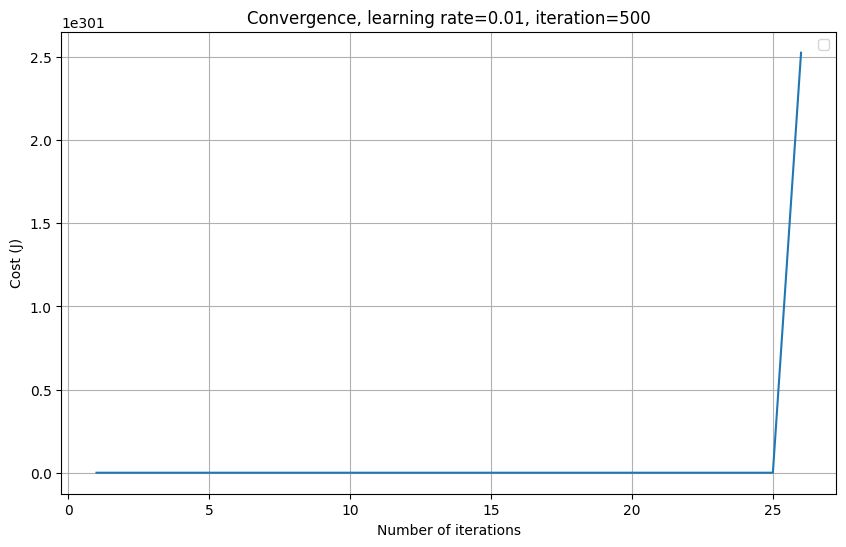

In [63]:
plt.plot(range(1, it + 1), cost_history_train)
plt.plot(range(1, it + 1), cost_history_valid)

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title(f'Convergence, learning rate={alpha}, iteration={it}')
plt.legend()

## Problem II B

## Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

### Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results

In [142]:
scaler = 'normalize'
# scaler = 'standard'

df_train = df.iloc[0:a,:]
df_valid = df.iloc[a:,:]
y_train = df_train.values[:, 0]
y_valid = df_valid.values[:, 0]

df_train1 = (df_train.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_train = pd.concat([df_train.iloc[:,[0,1,2,3,4,10,12]], df_train1], axis = 1)

df_valid1 = (df_valid.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_valid = pd.concat([df_valid.iloc[:,[0,1,2,3,4,10,12]], df_valid1], axis = 1)

df_train_s = df_train.drop(['price','furnishingstatus'], axis='columns')
df_valid_s = df_valid.drop(['price','furnishingstatus'], axis='columns')

if scaler == 'normalize':
    min_max_scaled= preprocessing.MinMaxScaler()
else:
    min_max_scaled= preprocessing.StandardScaler()

df_train_scaled = min_max_scaled.fit_transform(df_train_s)
df_valid_scaled = min_max_scaled.fit_transform(df_valid_s)
df_train_scaled = pd.DataFrame(df_train_scaled)
df_valid_scaled = pd.DataFrame(df_valid_scaled)
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.385799,0.50,0.333333,0.666667,0.666667,1.0,0.0,0.0,0.0,1.0,1.0
1,0.493529,0.50,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,0.563484,0.25,0.333333,0.333333,0.666667,1.0,0.0,1.0,0.0,0.0,1.0
3,0.391396,0.50,0.333333,0.333333,1.000000,1.0,0.0,1.0,0.0,1.0,1.0
4,0.385799,0.50,0.000000,0.333333,0.666667,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
431,0.089192,0.50,0.000000,0.333333,0.000000,1.0,0.0,1.0,0.0,1.0,0.0
432,0.290661,0.25,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0
433,0.110178,0.50,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
434,0.132004,0.50,0.000000,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [143]:
X1_train_scaled = df_train_scaled.values[:, 0]
X2_train_scaled = df_train_scaled.values[:, 1]
X3_train_scaled = df_train_scaled.values[:, 2]
X4_train_scaled = df_train_scaled.values[:, 3]
X5_train_scaled = df_train_scaled.values[:, 4]
X6_train_scaled = df_train_scaled.values[:, 5]
X7_train_scaled = df_train_scaled.values[:, 6]
X8_train_scaled = df_train_scaled.values[:, 7]
X9_train_scaled = df_train_scaled.values[:, 8]
X10_train_scaled = df_train_scaled.values[:, 9]
X11_train_scaled = df_train_scaled.values[:, 10]


X1_valid_scaled = df_valid_scaled.values[:, 0]
X2_valid_scaled = df_valid_scaled.values[:, 1]
X3_valid_scaled = df_valid_scaled.values[:, 2]
X4_valid_scaled = df_valid_scaled.values[:, 3]
X5_valid_scaled = df_valid_scaled.values[:, 4]
X6_valid_scaled = df_valid_scaled.values[:, 5]
X7_valid_scaled = df_valid_scaled.values[:, 6]
X8_valid_scaled = df_valid_scaled.values[:, 7]
X9_valid_scaled = df_valid_scaled.values[:, 8]
X10_valid_scaled = df_valid_scaled.values[:, 9]
X11_valid_scaled = df_valid_scaled.values[:, 10]

m_train_scaled = len(y_train)
m_valid_scaled = len(y_valid)
n_train_scaled = len(X1_train_scaled)
n_valid_scaled = len(X1_valid_scaled)


X_0_train_scaled = np.ones((m_train_scaled, 1))
X_1_train_scaled = X1_train_scaled.reshape(m_train_scaled, 1)
X_2_train_scaled = X2_train_scaled.reshape(m_train_scaled, 1)
X_3_train_scaled = X3_train_scaled.reshape(m_train_scaled, 1)
X_4_train_scaled = X4_train_scaled.reshape(m_train_scaled, 1)
X_5_train_scaled = X5_train_scaled.reshape(m_train_scaled, 1)
X_6_train_scaled = X6_train_scaled.reshape(m_train_scaled, 1)
X_7_train_scaled = X7_train_scaled.reshape(m_train_scaled, 1)
X_8_train_scaled = X8_train_scaled.reshape(m_train_scaled, 1)
X_9_train_scaled = X9_train_scaled.reshape(m_train_scaled, 1)
X_10_train_scaled = X10_train_scaled.reshape(m_train_scaled, 1)
X_11_train_scaled = X11_train_scaled.reshape(m_train_scaled, 1)


X_0_valid_scaled = np.ones((m_valid_scaled, 1))
X_1_valid_scaled = X1_valid_scaled.reshape(m_valid_scaled, 1)
X_2_valid_scaled = X2_valid_scaled.reshape(m_valid_scaled, 1)
X_3_valid_scaled = X3_valid_scaled.reshape(m_valid_scaled, 1)
X_4_valid_scaled = X4_valid_scaled.reshape(m_valid_scaled, 1)
X_5_valid_scaled = X5_valid_scaled.reshape(m_valid_scaled, 1)
X_6_valid_scaled = X6_valid_scaled.reshape(m_valid_scaled, 1)
X_7_valid_scaled = X7_valid_scaled.reshape(m_valid_scaled, 1)
X_8_valid_scaled = X8_valid_scaled.reshape(m_valid_scaled, 1)
X_9_valid_scaled = X9_valid_scaled.reshape(m_valid_scaled, 1)
X_10_valid_scaled = X10_valid_scaled.reshape(m_valid_scaled, 1)
X_11_valid_scaled = X11_valid_scaled.reshape(m_valid_scaled, 1)

X_train_scaled = np.hstack((X_0_train_scaled, X_1_train_scaled, X_2_train_scaled, X_3_train_scaled, X_4_train_scaled, X_5_train_scaled, X_6_train_scaled, X_7_train_scaled, X_8_train_scaled, X_9_train_scaled, X_10_train_scaled, X_11_train_scaled))
X_valid_scaled = np.hstack((X_0_valid_scaled, X_1_valid_scaled, X_2_valid_scaled, X_3_valid_scaled, X_4_valid_scaled, X_5_valid_scaled, X_6_valid_scaled, X_7_valid_scaled, X_8_valid_scaled, X_9_valid_scaled, X_10_valid_scaled, X_11_valid_scaled))


In [144]:
it = 500 # Maximum iterations
# alpha = 0.000000001 # Learning Rate
alpha = 0.01 # Learning Rate

# theta = np.zeros(5)
# theta_scaled = [1,1,1,1,1]
theta_scaled = [3,1,5,100,3.4,4.5,8.9,0.2,13,98,34,35.7]

print(f' Maximum iterations: {it}')
print(f'Learning rate is: {alpha}')
print(f'θ is: {theta_scaled}')

 Maximum iterations: 500
Learning rate is: 0.01
θ is: [3, 1, 5, 100, 3.4, 4.5, 8.9, 0.2, 13, 98, 34, 35.7]


In [145]:
cost_train_scaled = compute_cost(X_train_scaled, y_train, theta_scaled)
print('The cost of the test dataset for given values of theta_0 and theta_1 =', cost_train_scaled)

cost_valid_scaled = compute_cost(X_valid_scaled, y_valid, theta_scaled)
print('The cost of the validation dataset for given values of theta_0 and theta_1 =', cost_valid_scaled)

theta_scaled, cost_history_train_scaled = gradient_descent(X_train_scaled, y_train, theta_scaled, alpha, it)
print('Final value of theta for test =', theta_scaled)

theta_scaled, cost_history_valid_scaled = gradient_descent(X_valid_scaled, y_valid, theta_scaled, alpha, it)
print('Final value of theta for validation =', theta_scaled)


The cost of the test dataset for given values of theta_0 and theta_1 = 15435468761074.764
The cost of the validation dataset for given values of theta_0 and theta_1 = 3791221989405.1147
Final value of theta for test = [2024636.0008162279 821421.2101271544 761159.2138257601 709394.9234265799
 1039526.7730163104 808319.6881027549 1566303.835094219 351131.2171028954
 468305.9673273374 299917.8962863884 984888.8505952938 546466.1582566486]
Final value of theta for validation = [1657532.2599193377 637896.1871187608 470279.0172306601 628312.8482613574
 635018.4220584345 652680.4180830579 448130.3312666176 306692.2481933054
 224802.74427021257 280153.80720951 760351.8214958389 470528.5101556415]


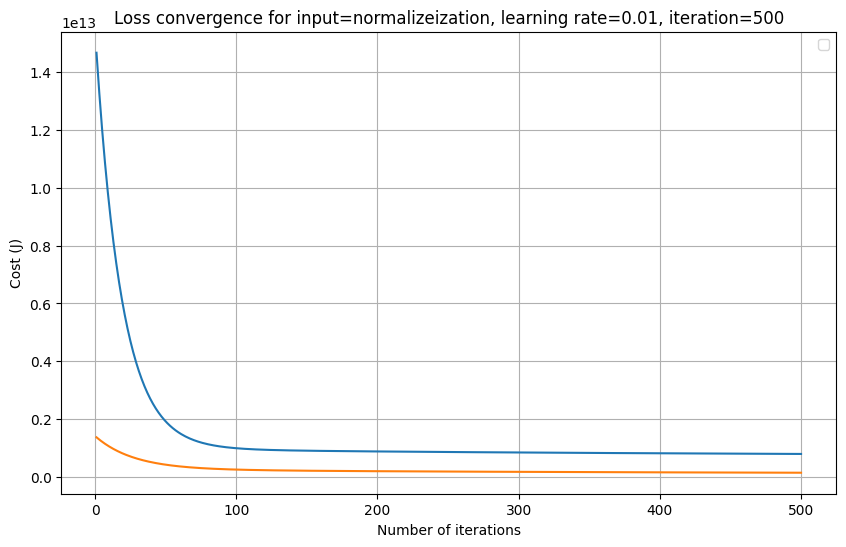

In [146]:
plt.plot(range(1, it + 1), cost_history_train_scaled)
plt.plot(range(1, it + 1), cost_history_valid_scaled)

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title(f'Loss convergence for input={scaler}ization, learning rate={alpha}, iteration={it}')
plt.legend()

## Problem III

###  A: Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

### Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

In [181]:
def compute_cost_reg(X, y, theta, lam):
    m_y = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m_y) * np.sum(sqrErrors) + lam / (2* m_y) * np.sum(theta[1:])
    return J

def gradient_descent_reg(X, y, theta, alpha, iterations, lam):
    m_y = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m_y) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost_reg(X, y, theta, lam)
    return theta, cost_history

In [182]:
# scaler = 'normalize'
scaler = 'standard'

df_train = df.iloc[0:a,:]
df_valid = df.iloc[a:,:]
y_train = df_train.values[:, 0]
y_valid = df_valid.values[:, 0]

df_train1 = (df_train.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_train = pd.concat([df_train.iloc[:,[0,1,2,3,4,10,12]], df_train1], axis = 1)

df_valid1 = (df_valid.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_valid = pd.concat([df_valid.iloc[:,[0,1,2,3,4,10,12]], df_valid1], axis = 1)

df_train_s = df_train.drop(['price','furnishingstatus'], axis='columns')
df_valid_s = df_valid.drop(['price','furnishingstatus'], axis='columns')

if scaler == 'normalize':
    min_max_scaled= preprocessing.MinMaxScaler()
else:
    min_max_scaled= preprocessing.StandardScaler()

df_train_scaled = min_max_scaled.fit_transform(df_train_s)
df_valid_scaled = min_max_scaled.fit_transform(df_valid_s)
df_train_scaled = pd.DataFrame(df_train_scaled)
df_valid_scaled = pd.DataFrame(df_valid_scaled)


In [183]:
X1_train_scaled = df_train_scaled.values[:, 0]
X2_train_scaled = df_train_scaled.values[:, 1]
X3_train_scaled = df_train_scaled.values[:, 2]
X4_train_scaled = df_train_scaled.values[:, 3]
X5_train_scaled = df_train_scaled.values[:, 4]

X1_valid_scaled = df_valid_scaled.values[:, 0]
X2_valid_scaled = df_valid_scaled.values[:, 1]
X3_valid_scaled = df_valid_scaled.values[:, 2]
X4_valid_scaled = df_valid_scaled.values[:, 3]
X5_valid_scaled = df_valid_scaled.values[:, 4]

m_train = len(y_train)
m_valid = len(y_valid)
n_train = len(X1_train_scaled)
n_valid = len(X1_valid_scaled)

X_0_train_scaled = np.ones((m_train, 1))
X_1_train_scaled = X1_train_scaled.reshape(m_train, 1)
X_2_train_scaled = X2_train_scaled.reshape(m_train, 1)
X_3_train_scaled = X3_train_scaled.reshape(m_train, 1)
X_4_train_scaled = X4_train_scaled.reshape(m_train, 1)


X_0_valid_scaled = np.ones((m_valid, 1))
X_1_valid_scaled = X1_valid_scaled.reshape(m_valid, 1)
X_2_valid_scaled = X2_valid_scaled.reshape(m_valid, 1)
X_3_valid_scaled = X3_valid_scaled.reshape(m_valid, 1)
X_4_valid_scaled = X4_valid_scaled.reshape(m_valid, 1)

X_train_scaled = np.hstack((X_0_train_scaled, X_1_train_scaled, X_2_train_scaled, X_3_train_scaled, X_4_train_scaled))
X_valid_scaled = np.hstack((X_0_valid_scaled, X_1_valid_scaled, X_2_valid_scaled, X_3_valid_scaled, X_4_valid_scaled))

In [184]:
it = 500 # Maximum iterations
# alpha = 0.1 # Learning Rate
alpha = 0.01 # Learning Rate

# theta_scaled = np.zeros(5)
# theta_scaled = [1,1,1,1,1]
theta_scaled = [3,1,5,100,3.4]

print(f' Maximum iterations: {it}')
print(f'Learning rate is: {alpha}')
print(f'θ is: {theta_scaled}')

 Maximum iterations: 500
Learning rate is: 0.01
θ is: [3, 1, 5, 100, 3.4]


In [185]:
# cost_train_scaled = compute_cost(X_train_scaled, y_train, theta_scaled)
cost_train_scaled = compute_cost_reg(X_train_scaled, y_train, theta_scaled, lam=0)
print('The cost of the test dataset for given values of theta_0 and theta_1 =', cost_train_scaled)

cost_valid_scaled = compute_cost(X_valid_scaled, y_valid, theta_scaled)
print('The cost of the validation dataset for given values of theta_0 and theta_1 =', cost_valid_scaled)

# theta_scaled, cost_history_train_scaled = gradient_descent(X_train_scaled, y_train, theta_scaled, alpha, it)
theta_scaled, cost_history_train_scaled = gradient_descent_reg(X_train_scaled, y_train, theta_scaled, alpha, it, lam=0)
print('Final value of theta for test =', theta_scaled)

theta_scaled, cost_history_valid_scaled = gradient_descent(X_valid_scaled, y_valid, theta_scaled, alpha, it)
print('Final value of theta for validation =', theta_scaled)


The cost of the test dataset for given values of theta_0 and theta_1 = 15435717293691.42
The cost of the validation dataset for given values of theta_0 and theta_1 = 3791276204046.038
Final value of theta for test = [5243088.465680327 716312.1583610106 114538.75604238409 577017.4838841883
 433481.597842064]
Final value of theta for validation = [2739143.51006105 118049.35467649084 -42125.98291176375
 -5674.5843261151485 74226.80428245997]


In [186]:
# plt.scatter(X_train_scaled[:,1], y_train, color='b', marker= '+', label= 'Training Data')
# plt.plot(X_train_scaled[:,1],X_train_scaled.dot(theta_train_scaled), color='r', label='Linear Regression')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('Input')
# plt.ylabel('House Price($)')
# plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
# plt.legend()
# plt.grid()

In [187]:
# plt.scatter(X_valid_scaled[:,1], y_valid, color='b', marker= '+', label= 'Training Data')
# plt.plot(X_valid_scaled[:,1], X_valid_scaled.dot(theta_valid_scaled), color='r', label='Linear Regression')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('Features')
# plt.ylabel('House Price($)')
# plt.title(f'LR, X1, learning rate={alpha}, iteration={it}')
# plt.legend()
# plt.grid()

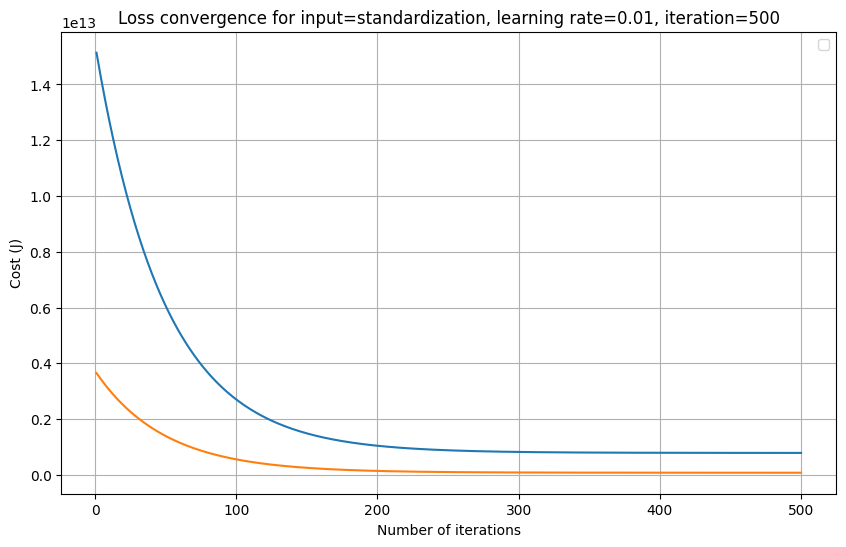

In [188]:
plt.plot(range(1, it + 1), cost_history_train_scaled)
plt.plot(range(1, it + 1), cost_history_valid_scaled)

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title(f'Loss convergence for input={scaler}ization, learning rate={alpha}, iteration={it}')
plt.legend()

### B: Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.

### Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

In [189]:
scaler = 'normalize'
# scaler = 'standard'


df_train = df.iloc[0:a,:]
df_valid = df.iloc[a:,:]

y_train = df_train.values[:, 0]
y_valid = df_valid.values[:, 0]

df_train1 = (df_train.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_train = pd.concat([df_train.iloc[:,[0,1,2,3,4,10,12]], df_train1], axis = 1)
df_valid1 = (df_valid.iloc[:,[5,6,7,8,9,11]] == "yes").replace(True,1).replace(False,0)
df_valid = pd.concat([df_valid.iloc[:,[0,1,2,3,4,10,12]], df_valid1], axis = 1)

df_train_s = df_train.drop(['price','furnishingstatus'], axis='columns')
df_valid_s = df_valid.drop(['price','furnishingstatus'], axis='columns')

if scaler == 'normalize':
    min_max= preprocessing.MinMaxScaler()
else:
    min_max= preprocessing.StandardScaler()

df_train_scaled = min_max_scaled.fit_transform(df_train_s)
df_valid_scaled = min_max_scaled.fit_transform(df_valid_s)
df_train_scaled = pd.DataFrame(df_train_scaled)
df_valid_scaled = pd.DataFrame(df_valid_scaled)

In [190]:
X1_train_scaled = df_train_scaled.values[:, 0]
X2_train_scaled = df_train_scaled.values[:, 1]
X3_train_scaled = df_train_scaled.values[:, 2]
X4_train_scaled = df_train_scaled.values[:, 3]
X5_train_scaled = df_train_scaled.values[:, 4]
X6_train_scaled = df_train_scaled.values[:, 5]
X7_train_scaled = df_train_scaled.values[:, 6]
X8_train_scaled = df_train_scaled.values[:, 7]
X9_train_scaled = df_train_scaled.values[:, 8]
X10_train_scaled = df_train_scaled.values[:, 9]
X11_train_scaled = df_train_scaled.values[:, 10]


X1_valid_scaled = df_valid_scaled.values[:, 0]
X2_valid_scaled = df_valid_scaled.values[:, 1]
X3_valid_scaled = df_valid_scaled.values[:, 2]
X4_valid_scaled = df_valid_scaled.values[:, 3]
X5_valid_scaled = df_valid_scaled.values[:, 4]
X6_valid_scaled = df_valid_scaled.values[:, 5]
X7_valid_scaled = df_valid_scaled.values[:, 6]
X8_valid_scaled = df_valid_scaled.values[:, 7]
X9_valid_scaled = df_valid_scaled.values[:, 8]
X10_valid_scaled = df_valid_scaled.values[:, 9]
X11_valid_scaled = df_valid_scaled.values[:, 10]

m_train_scaled = len(y_train)
m_valid_scaled = len(y_valid)
n_train_scaled = len(X1_train_scaled)
n_valid_scaled = len(X1_valid_scaled)


X_0_train_scaled = np.ones((m_train_scaled, 1))
X_1_train_scaled = X1_train_scaled.reshape(m_train_scaled, 1)
X_2_train_scaled = X2_train_scaled.reshape(m_train_scaled, 1)
X_3_train_scaled = X3_train_scaled.reshape(m_train_scaled, 1)
X_4_train_scaled = X4_train_scaled.reshape(m_train_scaled, 1)
X_5_train_scaled = X5_train_scaled.reshape(m_train_scaled, 1)
X_6_train_scaled = X6_train_scaled.reshape(m_train_scaled, 1)
X_7_train_scaled = X7_train_scaled.reshape(m_train_scaled, 1)
X_8_train_scaled = X8_train_scaled.reshape(m_train_scaled, 1)
X_9_train_scaled = X9_train_scaled.reshape(m_train_scaled, 1)
X_10_train_scaled = X10_train_scaled.reshape(m_train_scaled, 1)
X_11_train_scaled = X11_train_scaled.reshape(m_train_scaled, 1)


X_0_valid_scaled = np.ones((m_valid_scaled, 1))
X_1_valid_scaled = X1_valid_scaled.reshape(m_valid_scaled, 1)
X_2_valid_scaled = X2_valid_scaled.reshape(m_valid_scaled, 1)
X_3_valid_scaled = X3_valid_scaled.reshape(m_valid_scaled, 1)
X_4_valid_scaled = X4_valid_scaled.reshape(m_valid_scaled, 1)
X_5_valid_scaled = X5_valid_scaled.reshape(m_valid_scaled, 1)
X_6_valid_scaled = X6_valid_scaled.reshape(m_valid_scaled, 1)
X_7_valid_scaled = X7_valid_scaled.reshape(m_valid_scaled, 1)
X_8_valid_scaled = X8_valid_scaled.reshape(m_valid_scaled, 1)
X_9_valid_scaled = X9_valid_scaled.reshape(m_valid_scaled, 1)
X_10_valid_scaled = X10_valid_scaled.reshape(m_valid_scaled, 1)
X_11_valid_scaled = X11_valid_scaled.reshape(m_valid_scaled, 1)

X_train_scaled = np.hstack((X_0_train_scaled, X_1_train_scaled, X_2_train_scaled, X_3_train_scaled, X_4_train_scaled, X_5_train_scaled, X_6_train_scaled, X_7_train_scaled, X_8_train_scaled, X_9_train_scaled, X_10_train_scaled, X_11_train_scaled))
X_valid_scaled = np.hstack((X_0_valid_scaled, X_1_valid_scaled, X_2_valid_scaled, X_3_valid_scaled, X_4_valid_scaled, X_5_valid_scaled, X_6_valid_scaled, X_7_valid_scaled, X_8_valid_scaled, X_9_valid_scaled, X_10_valid_scaled, X_11_valid_scaled))


In [191]:
it = 500 # Maximum iterations
# alpha = 0.000000001 # Learning Rate
alpha = 0.01 # Learning Rate

# theta = np.zeros(5)
# theta = [1,1,1,1,1]
theta_scaled = [3,1,5,100,3.4,4.5,8.9,0.2,13,98,34,35.7]

print(f' Maximum iterations: {it}')
print(f'Learning rate is: {alpha}')
print(f'θ is: {theta}')

 Maximum iterations: 500
Learning rate is: 0.01
θ is: [1, 1, 1, 1, 1]


In [192]:
cost_train_scaled = compute_cost_reg(X_train_scaled, y_train, theta_scaled, lam=0)
print('The cost of the test dataset for given values of theta_0 and theta_1 =', cost_train_scaled)

cost_valid_scaled = compute_cost(X_valid_scaled, y_valid, theta_scaled)
print('The cost of the validation dataset for given values of theta_0 and theta_1 =', cost_valid_scaled)

theta_scaled, cost_history_train_scaled = gradient_descent_reg(X_train_scaled, y_train, theta_scaled, alpha, it, lam=0)
print('Final value of theta for test =', theta_scaled)

theta_scaled, cost_history_valid_scaled = gradient_descent(X_valid_scaled, y_valid, theta_scaled, alpha, it)
print('Final value of theta for validation =', theta_scaled)


The cost of the test dataset for given values of theta_0 and theta_1 = 15435655789901.389
The cost of the validation dataset for given values of theta_0 and theta_1 = 3791272807499.706
Final value of theta for test = [5243088.465680327 499876.10091177176 96236.54605115534 513843.6783679559
 390417.824332209 247584.90462665967 153786.95436186338 123966.96686803405
 144895.02625583878 191896.92419071632 379235.434034204 243886.24178724672]
Final value of theta for validation = [2739143.5100610494 130437.17015364485 -55665.28040405281
 -13287.167400567869 78430.42712986194 41773.15812392122
 -40568.49194456144 3534.5140079150738 66099.19852022118
 -2057.4835993882925 40934.778533450226 35438.93473774661]


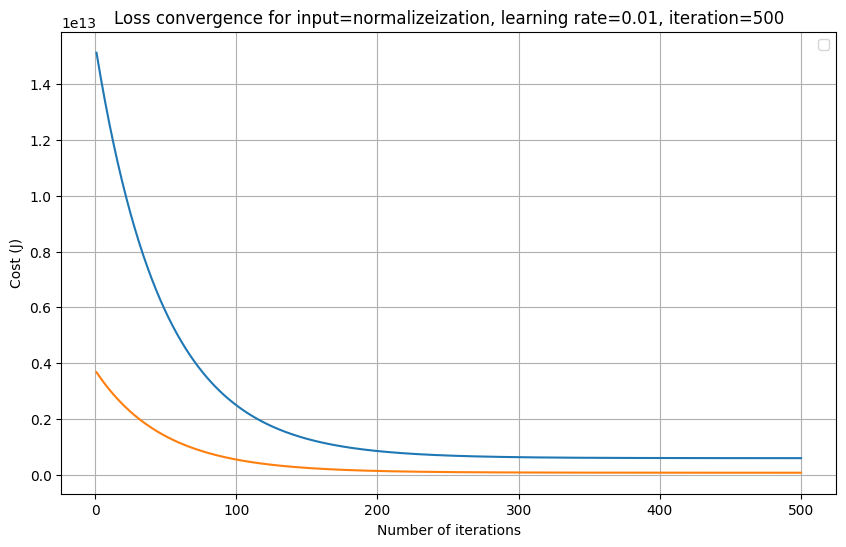

In [193]:
plt.plot(range(1, it + 1), cost_history_train_scaled)
plt.plot(range(1, it + 1), cost_history_valid_scaled)

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title(f'Loss convergence for input={scaler}ization, learning rate={alpha}, iteration={it}')
plt.legend()